In [1]:
import numpy as np

In [2]:
filename = '/home/duskdawn/analysis/iso-curve-info.csv'

# name, zz, nn, qq, moq ame (eV), error moq (eV), frequency (Hz), freq error (Hz), std (Hz), std error (Hz), calc
iso_curve_info = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', dtype=None)



/tmp/ipykernel_46796/2019956218.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  iso_curve_info = np.genfromtxt(


In [3]:
freq = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (6), dtype = np.double)
charge = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (3), dtype = np.double)
ref = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (-1), dtype = np.double)
mass_e = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (5), dtype = np.double)
moq = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (4), dtype = np.double)
std = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (8), dtype = np.double)

In [4]:
kcoeff = 1e-4
freq = freq * kcoeff
std = std * kcoeff
mass_e = mass_e / kcoeff
moq = moq / kcoeff

In [4]:
for isotope in iso_curve_info:
    print(isotope)

(b'$^{75}$Se$^{33+}$', 34, 41, 33, 2.11433539e+09, 72.65653218, 241810800, 4., 212., 3., 0.)
(b'$^{75}$As$^{33+}$', 33, 42, 33, 2.11430953e+09, 883.05631418, 241842320, 2., 208., 1., 0.)
(b'$^{68}$Zn$^{30+}$', 30, 38, 30, 2.10854346e+09, 777.79749192, 242184510, 1., 166., 1., 0.)
(b'$^{77}$Br$^{34+}$', 35, 42, 34, 2.10689657e+09, 2810.31740494, 242282310, 1., 170.2, 0.4, 0.)
(b'$^{70}$Ga$^{31+}$', 31, 39, 31, 2.10064135e+09, 1200.69576896, 242654310, 0.4, 108.1, 0.3, 0.)
(b'$^{70}$Ge$^{31+}$', 32, 38, 31, 2.10058774e+09, 819.71472202, 242657490, 2., 108.6, 1., 0.)
(b'$^{45}$Ca$^{20+}$', 20, 25, 20, 2.09331082e+09, 365.1456489, 243091000, 1., 103., 1., 0.)
(b'$^{72}$As$^{32+}$', 33, 39, 32, 2.09321978e+09, 4082.73821208, 243096440, 1., 89.44, 0.5, 0.)
(b'$^{72}$Ge$^{32+}$', 32, 40, 32, 2.09308398e+09, 75.45101419, 243104520, 0.1, 91.52, 0.07, 1.)
(b'$^{63}$Ni$^{28+}$', 28, 35, 28, 2.09301224e+09, 425.69275905, 243108800, 0.3, 89.6, 0.2, 0.)
(b'$^{54}$Cr$^{24+}$', 24, 30, 24, 2.09297939e

In [215]:
order = 2
scaling = 1
weights_0 = np.array([1 / (scaling**2 * isotope[8]**2) for isotope in iso_curve_info])
weights = [1 / np.sum([(k*a_vect[k]*freq**(k-1)*iso_curve_info[i][8]) for k in range(1,order+1)]) for i,_ in enumerate(iso_curve_info)]

In [216]:
weights_0, weights,iso_curve_info[i][8]

(array([2.22499110e-05, 2.31139053e-05, 3.62897373e-05, 3.45208029e-05,
        8.55753358e-05, 8.47891633e-05, 9.42595909e-05, 1.25007600e-04,
        1.19390007e-04, 1.24561543e-04, 1.15322504e-04, 6.47228664e-05,
        5.73921028e-05, 4.93151117e-05, 4.37417765e-05, 4.07771139e-05,
        2.59777776e-05, 2.31584193e-05, 1.53787005e-05, 1.28099430e-05,
        9.07243432e-06, 7.11111111e-06, 6.14204398e-06, 3.23482221e-06]),
 [-1.176129861176271e-05,
  -1.1987477431219683e-05,
  -1.5020453648757192e-05,
  -1.4649796155662129e-05,
  -2.3065636500404202e-05,
  -2.295944112056809e-05,
  -2.4207721414501884e-05,
  -2.787785449120857e-05,
  -2.7244266889135648e-05,
  -2.782807260818855e-05,
  -2.677615233777592e-05,
  -2.0059495621027304e-05,
  -1.8889358376467382e-05,
  -1.7509798495039984e-05,
  -1.6490709693741365e-05,
  -1.5922064531888213e-05,
  -1.2708436828204354e-05,
  -1.1999014945590445e-05,
  -9.778020806641939e-06,
  -8.924106319590889e-06,
  -7.510226824378596e-06,
  -6.64

In [217]:
# Generate A matrix // Using the frequencies in GHz, to avoid getting too high numbers
iteration = 1
A = np.zeros((order+1)*(order+1)).reshape(order+1,order+1)
for i in range(0,order+1):
    for j in range(0,order+1):
        if iteration == 0: A[i,j]= np.sum([weights_0[k]*freq[k]**(i+j) for k,_ in enumerate(iso_curve_info)])
        else: A[i,j]= np.sum([weights[k]*freq[k]**(i+j) for k,_ in enumerate(iso_curve_info)])

In [218]:
A

array([[-3.90482400e-04, -9.49854649e+04, -2.31055853e+13],
       [-9.49854649e+04, -2.31055853e+13, -5.62057744e+21],
       [-2.31055853e+13, -5.62057744e+21, -1.36725349e+30]])

In [219]:
np.linalg.inv(A), np.linalg.det(A)

(array([[-1.21602201e+13,  9.99195834e+04, -2.05255832e-04],
        [ 9.99195834e+04, -8.21035986e-04,  1.68658986e-12],
        [-2.05255832e-04,  1.68658986e-12, -3.46464853e-21]]),
 -2.4787685208858077e+25)

In [220]:
# Generate W matrix // Using the frequencies in GHz, to avoid getting too high numbers
iteration = 1
W = np.zeros(len(iso_curve_info)*len(iso_curve_info)).reshape(len(iso_curve_info),len(iso_curve_info))
for i in range(len(iso_curve_info)):
    for j in range(len(iso_curve_info)):
        if iteration == 0: W[i,j]= - weights_0[i] / charge[i] * weights_0[j] / charge[j] * f_vect[i] @ np.linalg.inv(A) @ f_vect[j]
        else: W[i,j] = - weights[i] / charge[i] * weights[j] / charge[j] * f_vect[i] @ np.linalg.inv(A) @ f_vect[j]
        print(W[i,j])
        if j == i: W[i,j] = W[i,j] + weights[j] / charge[j]**2
        if int(ref[j]) == 0: W[i,j] = W[i,j] + 1 / mass_e[j]**2

3.180303933974277e-09
3.1284309123186293e-09
2.773975183532446e-09
2.053358352342303e-09
1.6643362418338175e-09
1.642781213767387e-09
1.3840421204170157e-10
8.160338176892006e-11
5.382067642398704e-11
4.692063167243017e-11
4.4526884677351706e-11
-6.55553547857618e-10
-6.19791860157138e-10
-7.174096366856672e-10
-8.455010366240538e-10
-1.0340193382370307e-09
-5.239160942442189e-10
-5.415989591249579e-10
-4.4927905242678634e-10
-1.855619658708514e-10
5.926740482755287e-13
1.6164401609968913e-10
4.724562736367589e-10
7.585251169364991e-10
3.1284304927626617e-09
3.0784798655417955e-09
2.7437704543895e-09
2.0354077390270656e-09
1.6759359171270912e-09
1.6546202151983274e-09
2.0495446759239499e-10
1.2976368195997686e-10
1.0126153391640934e-10
1.0252627076919945e-10
1.07065795865464e-10
-6.163783639938408e-10
-5.829193441675215e-10
-6.791971070534538e-10
-8.051324495348888e-10
-9.906521385229016e-10
-5.062903208652982e-10
-5.264882387320716e-10
-4.4100134174386155e-10
-1.8978928779634653e-10
-

In [221]:
f_vect = np.array([[freq[i]**k for k in range(0,order+1)] for i in range(len(iso_curve_info))])

#change to weights (not 0)
#a_vect = np.linalg.inv(A)@sum([weights_0[i]*iso_curve_info[i][4]*f_vect[i] for i in range(len(iso_curve_info))])

a_vect = np.linalg.inv(A)@sum([weights[i]*iso_curve_info[i][4]*f_vect[i] for i in range(len(iso_curve_info))])
v = [moq[i]*charge[i]/(mass_e[i]**2) for i in range(len(iso_curve_info))]

In [222]:
a_vect, f_vect, v

(array([ 5.90765775e+09, -1.46745840e+01, -4.18140128e-09]),
 array([[1.00000000e+00, 2.41810800e+08, 5.84724630e+16],
        [1.00000000e+00, 2.41842320e+08, 5.84877077e+16],
        [1.00000000e+00, 2.42184510e+08, 5.86533369e+16],
        [1.00000000e+00, 2.42282310e+08, 5.87007177e+16],
        [1.00000000e+00, 2.42654310e+08, 5.88811142e+16],
        [1.00000000e+00, 2.42657490e+08, 5.88826575e+16],
        [1.00000000e+00, 2.43091000e+08, 5.90932343e+16],
        [1.00000000e+00, 2.43096440e+08, 5.90958791e+16],
        [1.00000000e+00, 2.43104520e+08, 5.90998076e+16],
        [1.00000000e+00, 2.43108800e+08, 5.91018886e+16],
        [1.00000000e+00, 2.43110760e+08, 5.91028416e+16],
        [1.00000000e+00, 2.43518450e+08, 5.93012355e+16],
        [1.00000000e+00, 2.43520910e+08, 5.93024336e+16],
        [1.00000000e+00, 2.43586920e+08, 5.93345876e+16],
        [1.00000000e+00, 2.43661160e+08, 5.93707609e+16],
        [1.00000000e+00, 2.43757360e+08, 5.94176506e+16],
        [1.

In [170]:
np.shape(W), np.shape(v)

((24, 24), (24,))

In [223]:
M = np.linalg.inv(W)@v
if (Maux - M[8]) < 1e5
Maux = M[8]

M

array([-1.35394495e+23, -1.33208960e+23, -9.92882530e+22, -1.05369949e+23,
       -7.09122777e+22, -7.06948650e+22, -2.62508752e+22, -4.16079293e+22,
       -4.10232773e+22, -3.56242797e+22, -3.04286704e+22, -1.10556427e+22,
       -1.08678237e+22, -5.11281707e+21, -8.86925381e+19,  4.64810140e+21,
        2.05037651e+22,  2.60779287e+22,  3.19862337e+22,  5.81451872e+22,
        6.40423959e+22,  9.07686900e+22,  9.77414053e+22,  1.31151451e+23])

In [514]:
auxx = moq
auxx

array([22698.32529661, 22698.04769033, 22636.14640718, 22618.46627331,
       22551.31375529, 22550.73826862, 22472.61725886, 22471.63986023,
       22470.1820288 , 22469.41183468, 22469.05920418, 22395.72467033,
       22395.28077025, 22383.42376769, 22370.08884502, 22352.81169242,
       22323.71555095, 22303.57413718, 22276.55677636, 22228.58846948,
       22192.23871062, 22158.5808713 , 22111.79602468, 22039.27705217])

In [4]:
freq = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (6), dtype = np.double)
kcoeff = (1e-8)#.astype(double)
print(freq, kcoeff, freq*kcoeff)

[2.4181080e+08 2.4184232e+08 2.4218451e+08 2.4228231e+08 2.4265431e+08
 2.4265749e+08 2.4309100e+08 2.4309644e+08 2.4310452e+08 2.4310880e+08
 2.4311076e+08 2.4351845e+08 2.4352091e+08 2.4358692e+08 2.4366116e+08
 2.4375736e+08 2.4391952e+08 2.4403179e+08 2.4418297e+08 2.4445033e+08
 2.4465343e+08 2.4484166e+08 2.4510373e+08 2.4551016e+08] 1e-08 [2.418108  2.4184232 2.4218451 2.4228231 2.4265431 2.4265749 2.43091
 2.4309644 2.4310452 2.431088  2.4311076 2.4351845 2.4352091 2.4358692
 2.4366116 2.4375736 2.4391952 2.4403179 2.4418297 2.4445033 2.4465343
 2.4484166 2.4510373 2.4551016]


In [4]:
# Read of the experimental data
freq = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (6), dtype = np.double)
charge = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (3), dtype = np.double)
ref = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (-1), dtype = np.double)
mass_e = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (5), dtype = np.double)
moq = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (4), dtype = np.double)
std = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (8), dtype = np.double)

# Coefficient to rescale the factors (to keep control on the determinant of A, otherwise it gives 0)
kcoeff = 1e-5
freq = freq * kcoeff
std = std * kcoeff
mass_e = mass_e / kcoeff
moq = moq / kcoeff

# Polynomial order
order = 2

# Initial weights
scaling = 1
weights_0 = np.array([1 / (scaling**2 * isotope[8]**2) for isotope in iso_curve_info])

# Array with the new moqs 
new_moqs = np.array([])
moq_errors = np.array([])

# Turn on (off the rest) the particles one by one
for p in range (len(iso_curve_info)):
    
    moq = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (4), dtype = np.double)
    moq = moq / kcoeff
    ref = np.zeros(len(iso_curve_info))
    ref[p] = 1
    
    for iteration in range(0,1000000):
        if iteration % 10000 == 0: print(iteration)
        if iteration > 0:
            # I have added the correction of power to 2
            weights = [1 / std[i] / np.sum([(k*a_vect[k]*freq**(k-1)) for k in range(1,order+1)])**2 for i,_ in enumerate(iso_curve_info)]
    
        # Generate A matrix // Using the frequencies in GHz, to avoid getting too high numbers
        # A should be fine
        A = np.zeros((order+1)*(order+1)).reshape(order+1,order+1)
        for i in range(0,order+1):
            for j in range(0,order+1):
                if iteration == 0: A[i,j]= np.sum([weights_0[k]*freq[k]**(i+j) for k,_ in enumerate(iso_curve_info)])
                else: A[i,j] = np.sum([weights[k]*freq[k]**(i+j) for k,_ in enumerate(iso_curve_info)])
                    
        f_vect = np.array([[freq[i]**k for k in range(0,order+1)] for i in range(len(iso_curve_info))])
        #print(np.linalg.det(A))
        if iteration == 0: a_vect = np.linalg.inv(A)@sum([weights_0[i] * moq[i] * f_vect[i] for i in range(len(iso_curve_info))])
        else: a_vect = np.linalg.inv(A) @ sum([weights[i] * moq[i] * f_vect[i] for i in range(len(iso_curve_info))])
        
        # We determine the masses
        for i in range(len(iso_curve_info)):
            if int(ref[i]) == 1:
                moq[i] = a_vect @ f_vect[i]
            else:
                if iteration == 0: c = charge[i] / weights_0[i] / (mass_e[i])**2
                else: c = charge[i] / weights[i] / (mass_e[i])**2
                moq[i] = (-moq[i] * charge[i] * c + a_vect @ f_vect[i]) * 1 / (1 / charge[i] - c) / charge[i]
                
    moq_errors = np.append(moq_errors, weights[p] * kcoeff)
    new_moqs = np.append(new_moqs, moq[p] * kcoeff)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000

950000
960000
970000
980000
990000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000

900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [6]:
new_moqs, moq_errors

(array([2.27037007, 2.2695912 , 2.26350237, 2.26174373, 2.25508587,
        2.25503025, 2.24725572, 2.24716331, 2.24701624, 2.24693891,
        2.24689928, 2.2395956 , 2.23955521, 2.23836658, 2.23703821,
        2.2353058 , 2.23239756, 2.23038151, 2.22767321, 2.2228713 ,
        2.21922918, 2.21584672, 2.21112982, 2.20379224]),
 array([2.53481858e-10, 2.59741305e-10, 3.25242060e-10, 3.17163354e-10,
        4.99170558e-10, 4.96873559e-10, 5.23735867e-10, 6.03136955e-10,
        5.89436290e-10, 6.02050748e-10, 5.79298987e-10, 4.33992056e-10,
        4.08675691e-10, 3.78837822e-10, 3.56797510e-10, 3.44504269e-10,
        2.74974155e-10, 2.59628964e-10, 2.11562963e-10, 1.93080026e-10,
        1.62484209e-10, 1.43832763e-10, 1.33650301e-10, 9.69426712e-11]))

In [ ]:
qwe = np.sqrt(weights)

In [5]:
A, np.sqrt(weights), kcoeff

(array([[8.44129209e+02, 2.05335773e+08, 4.99487287e+13],
        [2.05335773e+08, 4.99487287e+13, 1.21503392e+19],
        [4.99487287e+13, 1.21503392e+19, 2.95567383e+24]]),
 array([5.04233122, 5.0905843 , 5.6982993 , 5.62755208, 7.06132912,
        7.04505501, 7.23403638, 7.76306827, 7.67434458, 7.75613387,
        7.60812812, 6.58512065, 6.39016887, 6.15239636, 5.97067463,
        5.86682889, 5.24143011, 5.09303346, 4.59757911, 4.39224038,
        4.02930608, 3.79126086, 3.6549171 , 3.11359345]),
 0.001)

In [ ]:
5.04233122

In [5]:
A, np.sqrt(weights), kcoeff

(array([[3.01466790e-06, 7.33322762e-03, 1.78383626e+01, 4.33929273e+04],
        [7.33322762e-03, 1.78383626e+01, 4.33929273e+04, 1.05557004e+08],
        [1.78383626e+01, 4.33929273e+04, 1.05557004e+08, 2.56778885e+11],
        [4.33929273e+04, 1.05557004e+08, 2.56778885e+11, 6.24648520e+14]]),
 array([0.00030133, 0.00030422, 0.00034053, 0.00033631, 0.00042199,
        0.00042102, 0.00043231, 0.00046393, 0.00045862, 0.00046351,
        0.00045467, 0.00039353, 0.00038188, 0.00036767, 0.00035681,
        0.00035061, 0.00031323, 0.00030436, 0.00027475, 0.00026248,
        0.00024079, 0.00022657, 0.00021842, 0.00018607]),
 1e-05)

In [6]:
A, np.sqrt(weights)

(array([[8.44119044e-01, 2.05333300e+04, 4.99481272e+08],
        [2.05333300e+04, 4.99481272e+08, 1.21501928e+13],
        [4.99481272e+08, 1.21501928e+13, 2.95563823e+17]]),
 array([0.00159452, 0.00160977, 0.00180195, 0.00177958, 0.00223297,
        0.00222783, 0.00228759, 0.00245488, 0.00242683, 0.00245269,
        0.00240589, 0.00208239, 0.00202074, 0.00194555, 0.00188808,
        0.00185524, 0.00165748, 0.00161055, 0.00145387, 0.00138894,
        0.00127417, 0.00119889, 0.00115578, 0.0009846 ]))

In [14]:
std

array([212.  , 208.  , 166.  , 170.2 , 108.1 , 108.6 , 103.  ,  89.44,
        91.52,  89.6 ,  93.12, 124.3 , 132.  , 142.4 , 151.2 , 156.6 ,
       196.2 , 207.8 , 255.  , 279.4 , 332.  , 375.  , 403.5 , 556.  ])

In [5]:
moq_errors, new_moqs

(array([1.19567508e-16, 1.24566152e-16, 1.95560778e-16, 1.85995521e-16,
        4.61094942e-16, 4.56740701e-16, 5.07587772e-16, 6.73160206e-16,
        6.42949969e-16, 6.70808183e-16, 6.21039725e-16, 3.48596615e-16,
        3.09100622e-16, 2.65588141e-16, 2.35593995e-16, 2.19634375e-16,
        1.39909636e-16, 1.24731819e-16, 8.28187863e-17, 6.89773948e-17,
        4.88487174e-17, 3.82824953e-17, 3.30573478e-17, 1.74086748e-17]),
 array([2.27039014, 2.26961681, 2.26350431, 2.26176375, 2.25509331,
        2.25504369, 2.24727311, 2.24717584, 2.24702642, 2.24694021,
        2.24690608, 2.23958563, 2.23954527, 2.23835732, 2.23702588,
        2.23530994, 2.23238585, 2.23036497, 2.22764939, 2.22284891,
        2.21919452, 2.21581464, 2.21107818, 2.20377205]))

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from barion.particle import *
from barion.ring import *

In [7]:
freq

array([2.4181080e+08, 2.4184232e+08, 2.4218451e+08, 2.4228231e+08,
       2.4265431e+08, 2.4265749e+08, 2.4309100e+08, 2.4309644e+08,
       2.4310452e+08, 2.4310880e+08, 2.4311076e+08, 2.4351845e+08,
       2.4352091e+08, 2.4358692e+08, 2.4366116e+08, 2.4375736e+08,
       2.4391952e+08, 2.4403179e+08, 2.4418297e+08, 2.4445033e+08,
       2.4465343e+08, 2.4484166e+08, 2.4510373e+08, 2.4551016e+08])

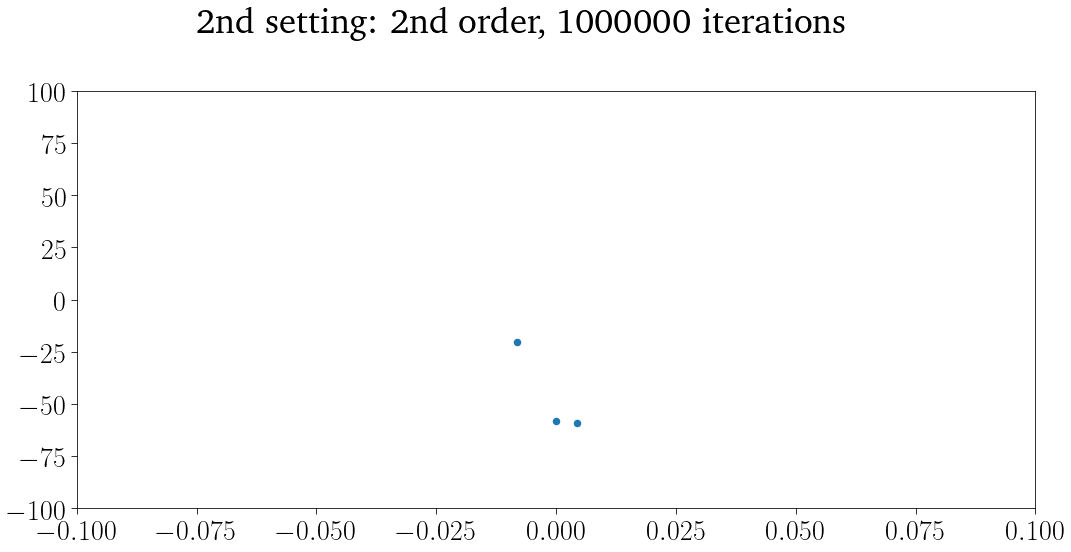

In [14]:
plt.style.use('plt-style.mplstyle')
plt.rc('axes', unicode_minus=False)
# figure
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.errorbar((freq-freq[8]) / kcoeff *1e-6, AMEData.to_mev((new_moqs - moq)* charge) *1e3, 
            yerr = AMEData.to_mev(moq_errors) * 1e3, fmt = 'o')

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.ylim(-100,100)
fig.suptitle('2nd setting: 2nd order, 1000000 iterations', fontsize=35)
plt.tight_layout()
plt.xlim(-0.1,0.1)
#filename = '2nd-2nd-order-1000000i3.pdf'
#plt.savefig(filename,dpi = 600, bbox_inches='tight')

plt.show()

In [8]:
moq = np.genfromtxt(
    filename, skip_header = 1, delimiter='  |  ', usecols = (4), dtype = np.double)

In [7]:
new_moqs * kcoeff - moq

array([ 5.46980199e-04, -1.87506016e-04, -9.70132948e-05, -9.08324896e-05,
       -3.98866741e-05, -4.46151911e-05,  1.20362582e-06, -9.08243437e-07,
       -1.00456724e-06,  5.94512905e-06,  1.30951959e-05,  2.70862581e-05,
        2.97454243e-05,  2.18068294e-05,  2.67917257e-05,  1.35616215e-05,
        3.78163051e-06,  1.99160130e-05,  3.32920953e-06, -1.21546653e-05,
       -4.23233456e-05, -4.59767827e-05, -7.87328855e-05, -1.73026476e-04])

In [10]:
new_moqs * kcoeff - moq

array([ 5.53958926e-04, -1.89241287e-04, -1.10679738e-04, -7.53615277e-05,
       -3.05940633e-05, -1.95204905e-05,  1.25716695e-05,  2.19664252e-06,
        1.27736245e-05, -9.14682669e-07,  1.03401270e-05,  2.52164929e-05,
        2.56795591e-05,  1.74230504e-05,  2.11264923e-05,  1.28829378e-05,
        2.71271971e-05,  1.93184290e-05, -1.95399151e-06, -5.20472525e-06,
       -3.71499845e-05, -5.81052904e-05, -8.98060866e-05, -1.71994738e-04])

In [530]:
(moq - moq2/kcoeff)*kcoeff * 32

array([-3.40402231e-07,  1.84475879e-05,  1.67513330e-05,  1.39503273e-04,
        3.16586733e-05,  1.42611972e-05, -5.81260677e-07, -5.10337370e-05,
       -1.23378563e-05, -7.71732186e-07, -9.57490643e-08, -2.44897130e-05,
       -1.65028032e-09, -3.53865193e-06, -8.87629762e-07, -5.34687753e-05,
       -6.09201379e-10, -1.53800905e-06,  1.89865008e-08,  1.25851881e-06,
        3.76977259e-07,  1.50506245e-06,  8.31431372e-07,  7.32356473e-07])

In [478]:
np.linalg.det(A)

3.3261484178465365e+28

In [420]:
mass = np.array([])

for i in range(len(iso_curve_info)):
    if int(ref[i]) == 1:
        mass = np.append(mass, a_vect @ f_vect[i] * charge[i])
    else:
        c = charge[i] / weights[i] / (mass_e[i])**2
        mass = np.append(mass, ((-moq[i] * charge[i] * c + a_vect @ f_vect[i]) * 1 / (1 / charge[i] - c)))

In [454]:
a_vect, mass*kcoeff, 1 / np.sqrt(np.array(weights)) * kcoeff

(array([ 6.14942314e+06, -1.41556069e+04, -7.80222662e+00]),
 array([74.90447348, 74.90355738, 67.90843922, 76.90278533, 69.90907264,
        69.90728863, 44.94523452, 71.90924755, 71.90458249, 62.91435314,
        53.92574209, 73.90589141, 73.90442654, 64.91192893, 55.92522211,
        46.94090455, 75.90063287, 66.91072241, 57.91904762, 68.90862426,
        59.91904452, 70.90745879, 61.91302887, 63.91010575]),
 array([9.13553574e-05, 8.96316714e-05, 7.15329685e-05, 7.33428388e-05,
        4.65826138e-05, 4.67980746e-05, 4.43849142e-05, 3.85416187e-05,
        3.94379354e-05, 3.86105661e-05, 4.01274098e-05, 5.35635421e-05,
        5.68816376e-05, 6.13632212e-05, 6.51553304e-05, 6.74823065e-05,
        8.45467978e-05, 8.95454871e-05, 1.09884982e-04, 1.20399466e-04,
        1.43065937e-04, 1.61595561e-04, 1.73876824e-04, 2.39592352e-04]))

In [422]:
[(mass[i] - moq[i] * charge[i])*kcoeff for i in range(len(iso_curve_info)) ]

[-8.514404296875e-12,
 5.152435302734376e-10,
 4.4538116455078125e-10,
 4.187713623046875e-09,
 1.0442504882812501e-09,
 4.766082763671875e-10,
 3.609466552734375e-11,
 3.7015380859375e-09,
 -0.000268939221862793,
 4.106903076171875e-11,
 4.24957275390625e-12,
 -2.1998596191406252e-10,
 -1.52587890625e-14,
 -3.0281066894531253e-11,
 -6.77490234375e-12,
 -3.31787109375e-10,
 0.0,
 -5.40924072265625e-12,
 4.46319580078125e-12,
 7.0953369140625e-11,
 1.166534423828125e-11,
 4.7531127929687504e-11,
 2.0805358886718752e-11,
 1.7921447753906252e-11]

In [313]:
[mass[i] / charge[i] - moq[i] for i in range(len(iso_curve_info)) ]

[-2.566835632933362e-13,
 1.5773160555454524e-11,
 1.5079937298878576e-11,
 1.2542944460847139e-10,
 3.491029687552327e-11,
 1.5939694009148297e-11,
 2.1023183194301964e-12,
 1.3496759265763103e-10,
 -9.931834443310805e-06,
 1.7394974349826953e-12,
 2.0961010704922955e-13,
 -5.061728813871014e-12,
 -4.440892098500626e-16,
 -8.15791878494565e-13,
 -2.1449508835758024e-13,
 -1.2562395568238571e-11,
 0.0,
 -4.263256414560601e-14,
 1.9317880628477724e-13,
 2.4660273822973977e-12,
 4.5075054799781356e-13,
 1.5276668818842154e-12,
 7.562839243746566e-13,
 6.24389429049188e-13]

In [307]:
[mass[i] - moq[i] * charge[i] for i in range(len(iso_curve_info)) ]

[-2.62456723021387e-13,
 1.497069135325546e-11,
 1.389954817909711e-11,
 1.1402301325347253e-10,
 2.87134760412755e-11,
 1.3078427230084344e-11,
 5.897504706808832e-13,
 3.696820627396846e-11,
 -2.1726762340357197e-06,
 3.530509218307998e-13,
 4.085620730620576e-14,
 -1.3242296148519017e-11,
 -8.881784197001252e-16,
 -1.979305608301729e-12,
 -5.013767179207207e-13,
 -2.9093172315697302e-11,
 -4.440892098500626e-16,
 -7.451816941284051e-13,
 8.43769498715119e-14,
 1.553424056055519e-12,
 3.539391002504999e-13,
 1.3078427230084344e-12,
 6.887823644774471e-13,
 5.910827383104333e-13]

In [308]:
m_aux = mass
AMEData.to_mev(mass[8])*1e6

NameError: name 'AMEData' is not defined

In [271]:
[weights[i] * moq[i] * f_vect[i] for i in range(len(iso_curve_info))]

[array([-2.48673396e+04, -6.01319128e+12, -1.45405459e+21]),
 array([-2.53452477e+04, -6.12955350e+12, -1.48238544e+21]),
 array([-3.16712917e+04, -7.67029627e+12, -1.85762694e+21]),
 array([-3.08656173e+04, -7.47819306e+12, -1.81183389e+21]),
 array([-4.84526488e+04, -1.17572441e+13, -2.85294594e+21]),
 array([-4.82283395e+04, -1.17029678e+13, -2.83981280e+21]),
 array([-5.06743050e+04, -1.23184675e+13, -2.99450858e+21]),
 array([-5.83544991e+04, -1.41857710e+13, -3.44851043e+21]),
 array([-5.70245609e+04, -1.38629285e+13, -3.37014058e+21]),
 array([-5.82445193e+04, -1.41597552e+13, -3.44236109e+21]),
 array([-5.60419569e+04, -1.36244027e+13, -3.31223890e+21]),
 array([-4.18470995e+04, -1.01905408e+13, -2.48158470e+21]),
 array([-3.94052376e+04, -9.59599932e+12, -2.33682649e+21]),
 array([-3.65079879e+04, -8.89286833e+12, -2.16618641e+21]),
 array([-3.43627006e+04, -8.37285549e+12, -2.04013968e+21]),
 array([-3.31521556e+04, -8.08108193e+12, -1.96982320e+21]),
 array([-2.64264513e+04,

In [252]:
-M[15]

4.359562349369445e+20

In [240]:
2.09308398e+09*32*1e-9

66.97868736000001

In [285]:
moq

array([2.26983253, 2.26980477, 2.26361464, 2.26184663, 2.25513138,
       2.25507383, 2.24726173, 2.24716399, 2.2470182 , 2.24694118,
       2.24690592, 2.23957247, 2.23952808, 2.23834238, 2.23700888,
       2.23528117, 2.23237156, 2.23035741, 2.22765568, 2.22285885,
       2.21922387, 2.21585809, 2.2111796 , 2.20392771])

In [268]:
np.sqrt(W[1][1])

0.0011289241713722514

In [ ]:
for i in range(len(iso_curve_info)):
    mass = np.array([])
    if int(ref[i]) == 1:
        mass = np.append(mass, a_vect @ f_vect[i] * charge[i])
    else:
        c = charge[i] / weights[i] / (mass_e[i])**2
        mass = np.append(mass, -moq[i] * charge[i] * c + a_vect @ f_vect[i]) * (1 / charge[i] - c)

In [451]:
for p in range (len(iso_curve_info)):
    ref = np.zeros(len(iso_curve_info))
    ref[p] = 1
    mass = np.array([])
    for i in range(len(iso_curve_info)):
        if int(ref[i]) == 1:
            mass = np.append(mass, a_vect @ f_vect[i] * charge[i])
        else:
            c = charge[i] / weights[i] / (mass_e[i])**2
            mass = np.append(mass, ((-moq[i] * charge[i] * c + a_vect @ f_vect[i]) * 1 / (1 / charge[i] - c)))
    print((mass[p] - moq[p] * charge[p])*kcoeff)

0.013086825479209422
-0.004646287731960416
-0.0026055450027436017
-0.002479709612071514
-0.0009628714826405048
-0.00094759695109725
3.9361077815294266e-05
6.609986267983914e-05
9.025228503346443e-05
8.448772940784693e-05
7.440080243349075e-05
0.0005788254568874836
0.0005860602535456418
0.0005270850367695093
0.00046307730941474437
0.0003911292556747794
0.0005355994249731302
0.00039661336132138967
-2.4888857409358024e-05
-0.0002498698383271694
-0.0006247198360413313
-0.0013037643501162528
-0.0020670630750209092
-0.003797704174481332


In [427]:
0.01288617402216792
-0.004846955938726663
-0.002788135208129883
-0.0026866981978267432
-0.0011517791915982962
-0.0011365062156915664
-8.265195085853338e-05
-0.00012912370063364504
-0.00010497531376779079
-8.633828968554735e-05
-7.202223363518715e-05
0.0003772849217355251
0.00038451846458017824
0.0003499430156871676
0.0003103400807753205
0.00026279893146455286
0.000327742049947381
0.00021315837356448172
-0.00018394298933446405
-0.000439636741399765
-0.0007900831791013479
-0.0014998406863212584
-0.002238739054150879
-0.003975685282826423

array(0)

In [ ]:
order = 2
scaling = 1
weights_0 = np.array([1 / (scaling**2 * isotope[8]**2) for isotope in iso_curve_info])
moq_table = moq
for iteration in range(0,100):
    if iteration % 10000 == 0: print(iteration)
    if iteration > 0:
        # I have added the correction of power to 2
        weights = [1 / np.sum([(k*a_vect[k]*freq**(k-1)*std[i]) for k in range(1,order+1)])**2 for i,_ in enumerate(iso_curve_info)]

    # Generate A matrix // Using the frequencies in GHz, to avoid getting too high numbers
    # A should be fine
    A = np.zeros((order+1)*(order+1)).reshape(order+1,order+1)
    for i in range(0,order+1):
        for j in range(0,order+1):
            if iteration == 0: A[i,j]= np.sum([weights_0[k]*freq[k]**(i+j) for k,_ in enumerate(iso_curve_info)])
            else: A[i,j] = np.sum([weights[k]*freq[k]**(i+j) for k,_ in enumerate(iso_curve_info)])
                
    f_vect = np.array([[freq[i]**k for k in range(0,order+1)] for i in range(len(iso_curve_info))])
    #print(np.linalg.det(A))
    if iteration == 0: a_vect = np.linalg.inv(A)@sum([weights_0[i] * moq[i] * f_vect[i] for i in range(len(iso_curve_info))])
    else: a_vect = np.linalg.inv(A) @ sum([weights[i] * moq[i] * f_vect[i] for i in range(len(iso_curve_info))])

    for i in range(len(iso_curve_info)):
        if int(ref[i]) == 1:
            moq[i] = a_vect @ f_vect[i]
        else:
            c = charge[i] / weights[i] / (mass_e[i])**2
            print(moq[i])
            moq[i] = (-moq[i] * charge[i] * c + a_vect @ f_vect[i]) * 1 / (1 / charge[i] - c) / charge[i]
            print(moq[i])

    # Until here fine so far
    
    # Generate W matrix
    
    #W = np.zeros(len(iso_curve_info)*len(iso_curve_info)).reshape(len(iso_curve_info),len(iso_curve_info))
    #
    #for i in range(len(iso_curve_info)):
    #    for j in range(len(iso_curve_info)):
    #        if iteration == 0: W[i,j]= - weights_0[i] / charge[i] * weights_0[j] / charge[j] * f_vect[i] @ np.linalg.inv(A) @ f_vect[j]
    #        else: W[i,j] = - weights[i] / charge[i] * weights[j] / charge[j] * f_vect[i] @ np.linalg.inv(A) @ f_vect[j]
    #        #print(W[i,j])
    #        if j == i: W[i,j] = W[i,j] + weights[j] / charge[j]**2
    #        if int(ref[j]) == 0: W[i,j] = W[i,j] + 1 / mass_e[j]**2
    #
    #
    #M = np.linalg.inv(W) @ v
    #print(M)
    

In [3]:
rev_t = np.array([1919326.46269841,
1922041.82849206,
1922817.95992063,
1922835.8668254,
1925770.01865079,
1929235.32733333,
1929278.65079365,
1929342.58333333,
1929376.66746032,
1929392.14285714,
1932627.65873016,
1932647.34920635,
1933170.89206349,
1933759.97619048,
1934523.0952381,
1935810.36428571,
1936701.24603175,
1937897.34920635,
1940022.8015873,
1941634.62698413,
1943128.6984127,
1945207.5952381,
1939359.03968254,
1917986.4488189,
1925795.33070866])


In [16]:
mq = np.array([2.26980477, 2.26361464, 2.2618466273312205, 2.26180392, 2.25513138,
       2.24726173, 2.24716398602329, 2.2470182 , 2.24694118, 2.24690592,
       2.23957247, 2.239528077025022, 2.23834238, 2.23700888, 2.23528117,
       2.23237156, 2.23035741, 2.22765568, 2.22285885, 2.21922387,
       2.21585809, 2.2111796 , 2.22435548, 2.27286235, 2.255073826862139])

In [17]:
len(mq), len(rev_t)

(25, 25)

In [13]:
import matplotlib.pyplot as plt

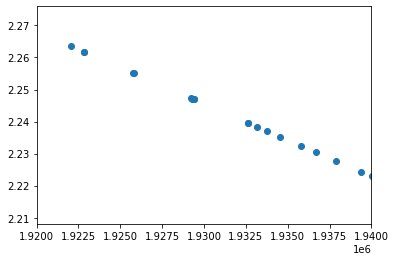

In [106]:

plt.scatter(rev_t,mq)
plt.xlim(1.92e6,1.94e6)
plt.show()

In [19]:
z = np.polyfit(rev_t, mq, 3)

In [20]:
z

array([-8.35839177e-19,  5.45746160e-12, -1.39933617e-05,  1.49331119e+01])

In [22]:
np.polyval(z, 1929332.26587302)

2.2470416980933887

In [23]:
2.2470416980933887-mq[7]

2.3498093388862884e-05

In [25]:
AMEData.to_mev(2.3498093388862884e-05)

NameError: name 'AMEData' is not defined

In [26]:
rev_t[7]

1929342.58333333

In [27]:
mq[7]

2.2470182

In [28]:
moq_eval = [np.polyval(z, revf) for revf in rev_t]

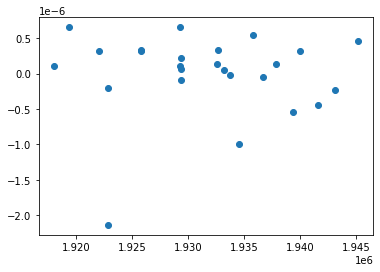

In [31]:
plt.scatter(rev_t,mq-moq_eval)
plt.show()

In [33]:
mq-moq_eval

array([ 6.51532127e-07,  3.18991994e-07, -2.00496206e-07, -2.13727535e-06,
        3.30773002e-07,  1.07598060e-07,  6.52925420e-07, -9.15735980e-08,
        2.11827174e-07,  5.89054872e-08,  1.27397633e-07,  3.24877939e-07,
        5.33895217e-08, -1.98300838e-08, -9.92489877e-07,  5.48265159e-07,
       -4.98312360e-08,  1.27047613e-07,  3.16365212e-07, -4.43442121e-07,
       -2.38503405e-07,  4.64321083e-07, -5.47259653e-07,  1.12800201e-07,
        3.13682945e-07])

In [34]:
z2 = np.polyfit(np.delete(rev_t,[3]), np.delete(mq,[3]), 3)

In [35]:
(np.polyval(z2, 1929332.26587302)-mq[7])*32

0.0007570000490630946

In [58]:
moq_eval2 = np.array([np.polyval(z2, revf) for revf in np.delete(rev_t,[3])])

In [43]:
from barion.particle import *
from barion.ring import *

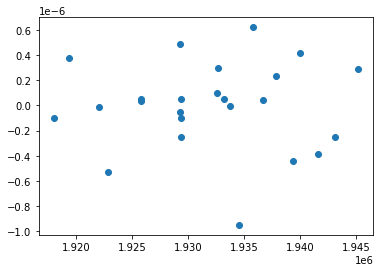

In [41]:
plt.scatter(np.delete(rev_t,[3]), np.delete(mq,[3])-moq_eval2)
plt.show()

In [66]:
qq = np.array([33, 30, 34, 34, 31, 20, 32, 32, 28, 24, 33, 33, 29, 25, 21, 34, 30,
       26, 31, 27, 32, 28, 22, 29, 31])

In [67]:
qq = np.delete(qq,[3])
mq2 = np.delete(mq,[3])

In [70]:
dmass = [AMEData.to_mev((mq2[i]-moq_eval2[i])*q)*1e3 for i,q in enumerate(qq)] #keV

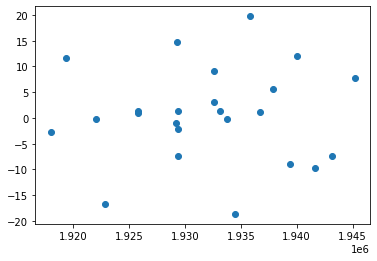

In [71]:
plt.scatter(np.delete(rev_t,[3]), dmass)
plt.show()

In [65]:
len(dmass)

23

In [101]:
z3 = np.polyfit(np.delete(rev_t,[3]), np.delete(mq,[3]), 3)
z5 = np.polyfit(np.delete(rev_t,[3]), np.delete(mq,[3]), 1)
z4 = np.polyfit(np.delete(rev_t,[3]), np.delete(mq,[3]), 2)

In [103]:
moq_eval3 = np.array([np.polyval(z3, revf) for revf in np.delete(rev_t,[3])])
moq_eval5 = np.array([np.polyval(z5, revf) for revf in 
                      np.delete(rev_t,[3])])
moq_eval4 = np.array([np.polyval(z4, revf) for revf in 
                      np.delete(rev_t,[3])])

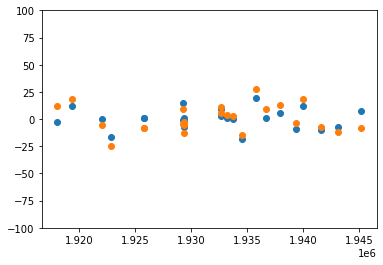

In [107]:
dmass3 = [AMEData.to_mev((mq2[i]-moq_eval3[i])*q)*1e3 for i,q in enumerate(qq)] #keV
dmass4 = [AMEData.to_mev((mq2[i]-moq_eval4[i])*q)*1e3 for i,q in enumerate(qq)] #keV
dmass5 = [AMEData.to_mev((mq2[i]-moq_eval5[i])*q)*1e3 for i,q in enumerate(qq)] #keV

plt.scatter(np.delete(rev_t,[3]), dmass3)
plt.scatter(np.delete(rev_t,[3]), dmass4)
plt.scatter(np.delete(rev_t,[3]), dmass5)
plt.ylim(-100,100)
plt.show()

In [100]:
dmass3

[-94022.38496088024,
 -258393.16745932927,
 -348767.65524263587,
 -511839.7060999062,
 -476787.2694591519,
 -765705.1148378749,
 -769982.6266832172,
 -675684.0773746995,
 -579895.0106811199,
 -1022710.5980953553,
 -1024005.030802828,
 -931851.1591402332,
 -834320.4822280208,
 -734580.9290197731,
 -1281398.8663498447,
 -1186867.321373506,
 -1093995.8324723723,
 -1442828.4930471962,
 -1348020.6336739447,
 -1697912.5591517522,
 -1607637.5365081574,
 -993085.4244427916,
 1326.4151029762859,
 -512183.1662198846]

In [91]:
z4 = np.polyfit(np.delete(rev_t,[3]), np.delete(mq,[3]), 2)

In [92]:
AMEData().to_mev((np.polyval(z4, 1929332.26587302)-mq[7])*32)*1e3

AME Database files are available.


705.1410054430784